# Linear Algebra np

In [43]:
from mxnet import np,autograd
import random

In [35]:
%matplotlib inline
from d2l import mxnet as d2l

In [36]:
#𝐲=𝐗𝐰+𝑏+𝜖.
def synthetic_data(w, b, num_examples):
    """Generate y = X w + b + noise."""
    X=np.random.normal(0,1,(num_examples,len(w)))
    y= np.dot(X,w) +b
    y+=np.random.normal(0,0.01,y.shape)
    return X, y
true_w = np.array([2, -3.4])
true_b = 4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [37]:
print('features:', features[0],'\nlabel:', labels[0])

features: [1.1630787 2.2122064] 
label: [-1.0015326]


/Users/juicydoggo/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


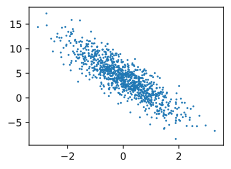

In [38]:
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1], labels, 1);

In [44]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices=np.array(
            indices[i:min(num_examples,i+batch_size)]
        )
        yield features[batch_indices], labels[batch_indices]

In [45]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print('Batch')
    print('X:',X)
    print('y:',y)
    break

Batch
X: [[-0.8254499   0.07335948]
 [-1.8567513   0.81389624]
 [-0.3612875  -1.3773831 ]
 [-1.4747815  -0.22913499]
 [-0.59164983 -0.7882176 ]
 [-0.20287366  0.46009848]
 [ 2.0752316  -0.63640165]
 [ 0.30198845  1.9984016 ]
 [-0.26465464  0.8230793 ]
 [ 1.6079236   0.16111839]]
y: [ 2.2795794 -2.2769194  8.150141   2.042786   5.710536   2.223512
 10.51308   -1.9877251  0.8667725  6.8682847]


In [46]:
w=np.random.normal(0,0.01,(2,1))
b=np.zeros(1)

In [47]:
w.attach_grad()
b.attach_grad()

In [48]:
def linreg(X, w, b):
    return np.dot(X, w) + b

In [49]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [50]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [51]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training dataset are used once in one epoch
    # iteration. The features and tags of minibatch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w, b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.050426
epoch 2, loss 0.000212
epoch 3, loss 0.000052
